# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 18

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['value_next10']  = df['xPoints_next10'] / (df['now_cost'] / 10.0)

In [6]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [7]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 3

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [8]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'xPoints_next10','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,28,30.652314,3.5,3.831539,NaN,33.794727,1.892262
475,Sá,Wolves,51,18.0,83,74.449994,4.6,4.136111,3.908241,35.425640,1.831501
408,Fabianski,West Ham,50,17.0,64,68.361082,3.8,4.021240,5.447856,42.396966,1.798353
146,Guaita,Crystal Palace,46,16.0,54,60.727803,3.4,3.795488,3.373034,39.646776,1.769655
80,Raya,Brentford,44,9.0,34,32.842992,3.8,3.649221,NaN,38.155352,1.739698
270,de Gea,Manchester Utd,51,16.0,66,62.840870,4.1,3.927554,4.772038,42.125822,1.739150
257,Ederson,Manchester City,60,17.0,75,72.319191,4.4,4.254070,5.037635,40.624093,1.736717
353,Lloris,Tottenham,54,15.0,65,60.451576,4.3,4.030105,3.887793,40.188750,1.734281
559,Ramsdale,Arsenal,52,15.0,77,58.841591,5.1,3.922773,4.580352,32.761258,1.720250


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
135,Chilwell,Chelsea,56,6.0,54,36.748798,9.0,6.124800,NaN,40.886207,2.588200
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,8.406651,35.340777,2.481689
256,Cancelo,Manchester City,68,17.0,109,107.045191,6.4,6.296776,6.709956,38.495705,2.414703
142,James,Chelsea,63,14.0,90,76.136528,6.4,5.438323,5.219379,34.772681,2.166680
122,Alonso,Chelsea,57,12.0,62,58.297595,5.2,4.858133,4.589807,32.465518,2.034848
264,Zinchenko,Manchester City,53,6.0,27,28.042479,4.5,4.673747,6.018208,30.552978,2.030146
252,Stones,Manchester City,53,6.0,32,27.971479,5.3,4.661913,4.809675,25.406449,2.025006
259,Laporte,Manchester City,55,14.0,62,66.333452,4.4,4.738104,7.015474,34.743902,2.020334
245,Tsimikas,Liverpool,37,7.0,30,26.045246,4.3,3.720749,0.000000,25.581079,1.934326


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
268,Torres,Manchester City,67,4.0,26,25.466247,6.5,6.366562,NaN,35.181238,2.459617
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,7.337313,41.596279,2.191471
265,Foden,Manchester City,81,11.0,61,67.120928,5.5,6.101903,7.481141,45.240387,2.143990
250,Gündogan,Manchester City,73,12.0,62,68.369740,5.2,5.697478,4.736528,39.403432,2.108731
266,Rodrigo,Manchester City,55,12.0,51,58.376740,3.2,4.864728,2.632641,40.742927,2.074327
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,5.734949,38.895373,2.056256
210,Tielemans,Leicester City,64,12.0,67,60.715233,5.6,5.059603,11.048812,43.100936,1.999984
144,Gallagher,Crystal Palace,61,16.0,89,76.536951,5.6,4.783559,3.882147,40.097735,1.936807
96,Mbeumo,Brentford,54,15.0,52,66.008913,3.5,4.400594,5.380260,34.436502,1.893714


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540,7.7,8.513333,NaN,35.330334,3.028908
450,Dennis,Watford,60,15.0,84,63.326,5.6,4.221733,5.166667,37.583842,1.723515
468,King,Watford,58,14.0,56,58.033,4.0,4.145214,2.533333,35.368812,1.721207
78,Toney,Brentford,66,14.0,55,58.782,3.9,4.198714,3.500000,37.608668,1.634347
189,Bamford,Leeds United,77,6.0,25,27.142,4.2,4.523667,2.000000,36.941758,1.630216
413,Antonio,West Ham,78,16.0,75,72.675,4.7,4.542187,2.892750,47.316936,1.626364
263,Jesus,Manchester City,87,15.0,65,71.597,4.3,4.773133,4.335500,38.133056,1.618244
63,Maupay,Brighton,64,14.0,55,52.120,3.9,3.722857,7.100000,36.068049,1.471588
315,Pukki,Norwich City,59,17.0,60,60.440,3.5,3.555294,3.150000,33.941648,1.463691


Below we compile a list sorting players based on a given metric (irrespective of position).

In [9]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,xPoints_next10,valuePoints metric
id,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,35.330334,3.028908
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,41.596279,2.191471
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,35.340777,2.481689
268,Torres,Manchester City,67,4.0,26,25.466247,6.5,6.366562,35.181238,2.459617
544,Branthwaite,Everton,40,1.0,9,6.297786,9.0,6.297786,36.048385,3.148893
256,Cancelo,Manchester City,68,17.0,109,107.045191,6.4,6.296776,38.495705,2.414703
135,Chilwell,Chelsea,56,6.0,54,36.748798,9.0,6.124800,40.886207,2.588200
265,Foden,Manchester City,81,11.0,61,67.120928,5.5,6.101903,45.240387,2.143990
253,Mendy,Manchester City,52,1.0,3,6.095247,3.0,6.095247,34.350576,2.672942


In [10]:
metric = 'valuePoints metric'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','xPoints_next10',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,xPoints_next10,valuePoints metric
id,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,7.7,8.513333,NaN,35.330334,3.028908
135,Chilwell,Chelsea,56,6.0,9.0,6.124800,NaN,40.886207,2.588200
237,Alexander-Arnold,Liverpool,83,16.0,7.9,7.149678,8.406651,35.340777,2.481689
268,Torres,Manchester City,67,4.0,6.5,6.366562,NaN,35.181238,2.459617
256,Cancelo,Manchester City,68,17.0,6.4,6.296776,6.709956,38.495705,2.414703
233,Salah,Liverpool,130,18.0,9.4,7.901461,7.337313,41.596279,2.191471
142,James,Chelsea,63,14.0,6.4,5.438323,5.219379,34.772681,2.166680
265,Foden,Manchester City,81,11.0,5.5,6.101903,7.481141,45.240387,2.143990
250,Gündogan,Manchester City,73,12.0,5.2,5.697478,4.736528,39.403432,2.108731


In [11]:
metric = 'adjusted points per game'

display(df[minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 10',\
                                                        'xPoints_next10','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 10,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
177,Calvert-Lewin,Everton,79,3.0,23,25.540000,7.7,8.513333,NaN,35.330334,3.028908
233,Salah,Liverpool,130,18.0,170,142.226301,9.4,7.901461,7.676813,41.596279,2.191471
237,Alexander-Arnold,Liverpool,83,16.0,126,114.394848,7.9,7.149678,7.837854,35.340777,2.481689
268,Torres,Manchester City,67,4.0,26,25.466247,6.5,6.366562,NaN,35.181238,2.459617
256,Cancelo,Manchester City,68,17.0,109,107.045191,6.4,6.296776,6.605213,38.495705,2.414703
135,Chilwell,Chelsea,56,6.0,54,36.748798,9.0,6.124800,6.876605,40.886207,2.588200
265,Foden,Manchester City,81,11.0,61,67.120928,5.5,6.101903,7.103641,45.240387,2.143990
240,Jota,Liverpool,81,17.0,94,99.487507,5.5,5.852206,6.241044,38.895373,2.056256
250,Gündogan,Manchester City,73,12.0,62,68.369740,5.2,5.697478,6.208747,39.403432,2.108731


In [12]:
metric = f'gameweek {gameweek+1} prediction'
#metric = f'xPoints_next10'

display(df[forwards & (df['now_cost']<=60)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 19 prediction,valuePoints metric
id,,,,,,,,,,
315,Pukki,Norwich City,59,17.0,60,60.440,3.5,3.555294,3.222594,1.463691
525,A.Armstrong,Southampton,58,15.0,47,52.613,3.1,3.507533,3.172068,1.456424
518,Broja,Southampton,52,13.0,47,41.871,3.6,3.220846,3.039725,1.412434
126,Batshuayi,Chelsea,55,NaN,0,NaN,0.0,NaN,2.896507,NaN
153,Ayew,Crystal Palace,58,16.0,37,40.342,2.3,2.521375,2.694323,1.046944
542,Street,Crystal Palace,45,NaN,0,NaN,0.0,NaN,2.517273,NaN
640,Young-Coombes,Brentford,45,NaN,0,NaN,0.0,NaN,2.476410,NaN
95,Dervişoğlu,Brentford,54,NaN,0,NaN,0.0,NaN,2.476410,NaN
447,Welbeck,Brighton,59,4.0,14,11.600,3.5,2.900000,2.420460,1.193911


In [13]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,
233,Salah,Liverpool,130,18.0,9.4,7.901461,2.191471,10.9,6.5,17.4,0.966667
240,Jota,Liverpool,81,17.0,5.5,5.852206,2.056256,10.2,3.2,13.4,0.788235
230,Mané,Liverpool,118,18.0,4.9,5.410517,1.575062,8.9,2.7,11.6,0.644444
579,Ronaldo,Manchester Utd,125,13.0,5.2,5.144769,1.455160,7.2,1.5,8.7,0.669231
205,Vardy,Leicester City,105,15.0,5.1,4.404733,1.359330,6.0,1.1,7.1,0.473333
196,Raphinha,Leeds United,66,16.0,5.1,4.718067,1.836505,5.9,2.7,8.6,0.537500
468,King,Watford,58,14.0,4.0,4.145214,1.721207,5.8,2.0,7.8,0.557143
4,Aubameyang,Arsenal,96,14.0,3.1,3.600786,1.162149,5.8,0.8,6.6,0.471429
357,Kane,Tottenham,121,14.0,2.8,4.269357,1.227354,5.8,2.6,8.4,0.600000


## Player Visualizations

In [14]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,gameweek 19 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
413,Antonio,West Ham,78,16.0,75,72.675,4.7,4.542187,4.379338,47.316936,1.626364


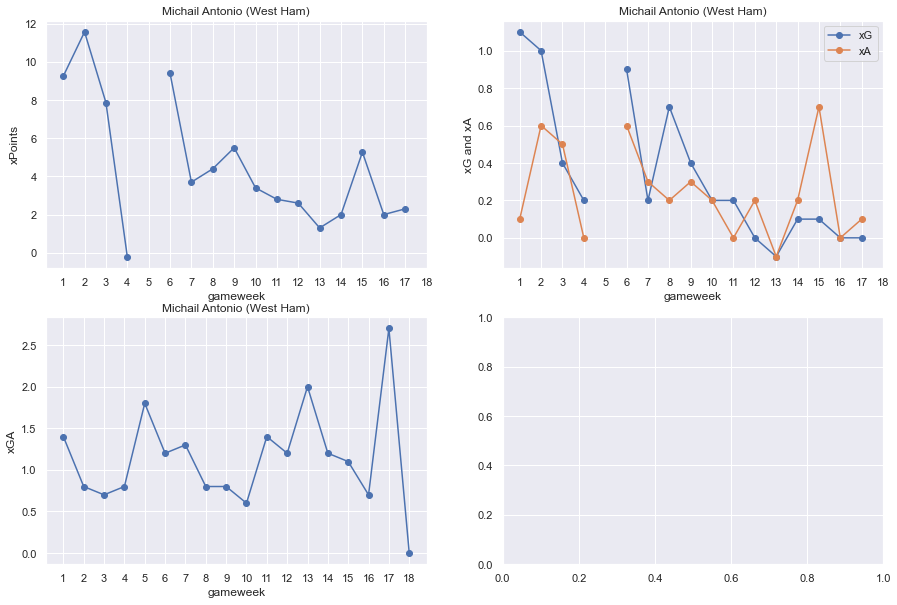

In [23]:
# find player index
name_string = 'Antonio'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound[['web_name','team_name','now_cost','games played','total_points','adjusted points',\
                      'points_per_game','adjusted points per game',f'gameweek {gameweek+1} prediction',\
                      'xPoints_next10', 'valuePoints metric']])
# plot xPoints over time
ix = playersFound.index[0]
#ix = 468

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [24]:
session = requests.session()

In [25]:
filepath = Path('../../../access_control/FPL_access.txt')
with open(filepath) as file:
    text = file.read().splitlines()
    email = text[0]
    password = text[1]

In [26]:
url = 'https://users.premierleague.com/accounts/login/'

payload = {
'password': password,
'login': email,
'redirect_uri': 'https://fantasy.premierleague.com/a/login', 'app': 'plfpl-web'
}
session.post(url, data=payload)

<Response [200]>

In [30]:
response = session.get('https://fantasy.premierleague.com/api/my-team/3202682')
team = response.json()['picks']

In [31]:
my_player_ix = [player['element'] for player in team]
my_starting11 = my_player_ix[:-4]
my_subs = my_player_ix[-4:]

In [32]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + \
                df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11, f'gameweek {gameweek+1} prediction'].sum() + \
                df.loc[my_starting11,f'gameweek {gameweek+1} prediction'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Predicted points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
           f'gameweek {gameweek+1} prediction','xPoints_next10', 'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10', \
         f'gameweek {gameweek+1} prediction', 'xPoints_next10', 'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 55.20499840316031
Predicted points next gameweek: 48.010741233825684


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 19 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
559,Ramsdale,Arsenal,52,15.0,5.1,3.922773,4.580352,4.651834,4.715766,32.761258,1.720250
256,Cancelo,Manchester City,68,17.0,6.4,6.296776,6.709956,6.605213,3.996333,38.495705,2.414703
425,Johnson,West Ham,40,9.0,3.1,2.919933,1.752388,2.732835,2.670326,28.805506,1.459966
142,James,Chelsea,63,14.0,6.4,5.438323,5.219379,6.771253,4.784050,34.772681,2.166680
491,Livramento,Southampton,44,17.0,3.1,2.949857,2.423649,3.115045,3.014807,33.269267,1.406289
144,Gallagher,Crystal Palace,61,16.0,5.6,4.783559,3.882147,5.198698,3.796710,40.097735,1.936807
138,Mount,Chelsea,77,15.0,5.8,5.096575,6.417302,6.014741,4.537439,33.833756,1.836678
250,Gündogan,Manchester City,73,12.0,5.2,5.697478,4.736528,6.208747,4.148498,39.403432,2.108731
145,Gilmour,Norwich City,44,10.0,2.3,2.608712,2.663197,2.688747,2.081589,22.637352,1.243655



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,gameweek 19 prediction,xPoints_next10,valuePoints metric
id,,,,,,,,,,,
376,Foster,Watford,41,8.0,3.5,3.831539,NaN,4.833942,0.0,33.794727,1.892262
233,Salah,Liverpool,130,18.0,9.4,7.901461,7.337313,7.676813,0.0,41.596279,2.191471
237,Alexander-Arnold,Liverpool,83,16.0,7.9,7.149678,8.406651,7.837854,0.0,35.340777,2.481689
450,Dennis,Watford,60,15.0,5.6,4.221733,5.166667,5.636429,0.0,37.583842,1.723515


## Save data

In [22]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)